Importing the required librabies and the data

In [1]:
import numpy as np
import pandas as pd

sdata = pd.read_csv('D:\\TheSparksFoundation\\LRB.csv')
sdata

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


From the data we can see that , we are having two numerical variables hours and scores 
we will try to check whether if the two variables are having any relationship between them

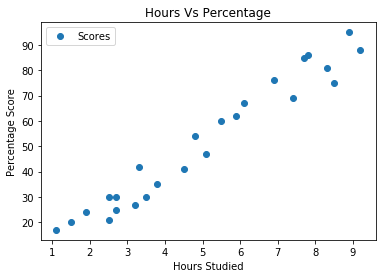

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

sdata.plot(x='Hours' , y ='Scores',style ='o')
plt.title('Hours Vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

From the above graph , we could observe that as there is a linear relationship , between the two variables 
as hours are increasing the percentage gained by the student has also been increasing gradually.

Assumpations of linear regrssion

1. Linearity        : There should be a linear relationship between the two variables 

2. Independent      : There should be no multicollinearity  - No collinearity exists between the independent variables

3. Homoscadisticity : The variance of the residual is the same for any value of x

4. Normality        : For any fixed value of X,Y are normally distributed

In [15]:
X = sdata.iloc[:,:-1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [16]:
Y =sdata.iloc[:,1:].values
Y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [17]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train ,y_test = train_test_split(X,Y,test_size =0.2,random_state = 0)

In [18]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression ()
reg.fit(X_train ,y_train)

LinearRegression()

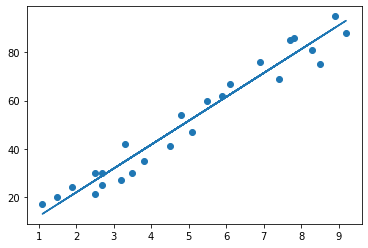

In [19]:
# Plotting the regression line
line = reg.coef_*X+reg.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

As , now we have finished working on training data , we will work on the test data

In [20]:
y_pred = reg.predict(X_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

Compare the values of both predicted and actual values

In [26]:
frames =[y_test,y_pred]
frames

[array([[20],
        [27],
        [69],
        [30],
        [62]], dtype=int64),
 array([[16.88414476],
        [33.73226078],
        [75.357018  ],
        [26.79480124],
        [60.49103328]])]

In [39]:
y_test = y_test.flatten()
y_pred = y_pred.flatten()
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred} )  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Now we can check for the new values

In [48]:
hours = 9.25
own_pred = reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = [93.69173249]


Checking the assumptions of the linear regression

In [ ]:
Homoscadisticity : The variance of the residual is the same for any value of x


In [49]:
# We will find out the residuals and then we will check
df['residuals'] = df['Actual'] - df['Predicted']
df

,Actual,Predicted,residuals
0,20,16.884145,3.115855
1,27,33.732261,-6.732261
2,69,75.357018,-6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


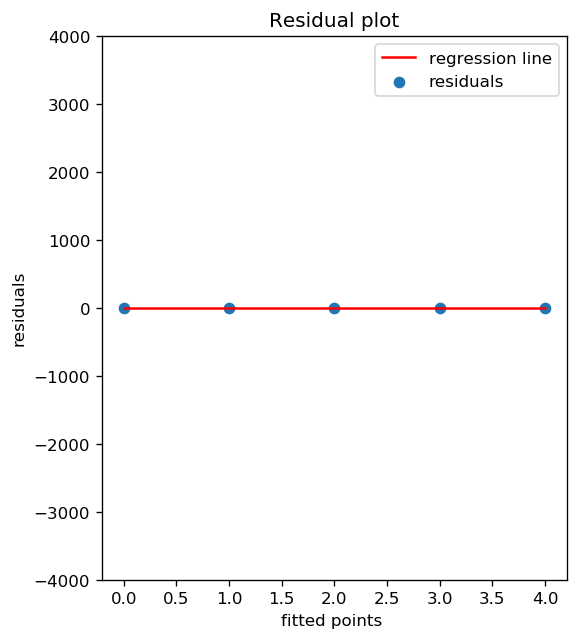

In [52]:
plt.figure(figsize=(5, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,5)
k = [0 for i in range(0,5)]
plt.scatter( f, df.residuals[:], label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-4000, 4000)
plt.legend()

In [ ]:
From the above graph , we could see that the residuals are exactly on the regression line

In [58]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
